# Lending Club Case Study 

In [1]:
# Import necessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 10000)

pd.set_option('display.max_columns', 120)

pd.options.display.float_format = '{:.2f}'.format

## Reading the data

In [2]:
raw_loan_data = pd.read_csv('loan.csv')
raw_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# understand data shape, rowas and clumns
raw_loan_data.shape

(39717, 111)

In [4]:
raw_loan_data.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## It is observed that there are a lot of columns with all null values. Let's first remove them

In [5]:
raw_loan_data.dropna(axis=1, how='all', inplace=True)
raw_loan_data.shape

(39717, 57)

## multiple colums are not required for this Analysis so deleting those columns

In [6]:
columns_to_drop = [
    "acc_now_delinq", "application_type", "chargeoff_within_12_mths", "collections_12_mths_ex_med", 
    "delinq_amnt", "initial_list_status", "policy_code", "pymnt_plan", "url", "zip_code", "desc", 
    "emp_title", "funded_amnt", "id", "member_id", "out_prncp", "out_prncp_inv", "recoveries", "revol_bal", 
    "title", "total_pymnt", "total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "total_rec_prncp",
    "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "collection_recovery_fee",
    "last_credit_pull_d", "last_pymnt_amnt", "last_pymnt_d", "pub_rec_bankruptcies", "tax_liens", "delinq_2yrs",
    "earliest_cr_line", "installment", "open_acc", "total_acc"
]

raw_loan_data = raw_loan_data.drop(columns = columns_to_drop)

In [7]:
#Check Dataframe shape
raw_loan_data.shape

(39717, 18)

In [8]:
raw_loan_data.isna().sum()
#Identify null values in dataframe

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
pub_rec                   0
revol_util               50
dtype: int64

In [9]:
raw_loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [10]:
raw_loan_data = raw_loan_data[raw_loan_data['loan_status'] != 'Current']
raw_loan_data.shape

(38577, 18)

## Understand Percentage of na values in dataframe

In [11]:
(raw_loan_data.isna().sum()/raw_loan_data.shape[0])*100

loan_amnt             0.00
funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
grade                 0.00
sub_grade             0.00
emp_length            2.68
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
addr_state            0.00
dti                   0.00
inq_last_6mths        0.00
pub_rec               0.00
revol_util            0.13
dtype: float64

In [12]:
raw_loan_data=raw_loan_data.dropna(subset=['revol_util'])

In [13]:
(raw_loan_data.isna().sum()/raw_loan_data.shape[0])*100

loan_amnt             0.00
funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
grade                 0.00
sub_grade             0.00
emp_length            2.67
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
addr_state            0.00
dti                   0.00
inq_last_6mths        0.00
pub_rec               0.00
revol_util            0.00
dtype: float64

In [14]:
emp_length_mode = raw_loan_data.emp_length.mode()[0]
raw_loan_data.fillna(emp_length_mode, inplace = True)
(raw_loan_data.isna().sum()/raw_loan_data.shape[0])*100

loan_amnt             0.00
funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
grade                 0.00
sub_grade             0.00
emp_length            0.00
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
addr_state            0.00
dti                   0.00
inq_last_6mths        0.00
pub_rec               0.00
revol_util            0.00
dtype: float64

In [15]:
clean_loan_data = raw_loan_data
clean_loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,pub_rec,revol_util
0,5000,4975.00,36 months,10.65%,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,0,83.70%
1,2500,2500.00,60 months,15.27%,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,5,0,9.40%
2,2400,2400.00,36 months,15.96%,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,0,98.50%
3,10000,10000.00,36 months,13.49%,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1,0,21%
5,5000,5000.00,36 months,7.90%,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,3,0,28.30%


In [16]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   grade                38527 non-null  object 
 5   sub_grade            38527 non-null  object 
 6   emp_length           38527 non-null  object 
 7   home_ownership       38527 non-null  object 
 8   annual_inc           38527 non-null  float64
 9   verification_status  38527 non-null  object 
 10  issue_d              38527 non-null  object 
 11  loan_status          38527 non-null  object 
 12  purpose              38527 non-null  object 
 13  addr_state           38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  inq_last_6mths       38527 non-null  int6

In [17]:
clean_loan_data['loan_amnt'] = clean_loan_data['loan_amnt'].astype('float')
clean_loan_data['issue_d'] = pd.to_datetime(clean_loan_data['issue_d'], format='%b-%y')

In [18]:
clean_loan_data['term'].value_counts()

term
36 months    29049
60 months     9478
Name: count, dtype: int64

In [19]:
clean_loan_data['term'] = clean_loan_data['term'].str.extract('(\d+)').astype('int')
clean_loan_data['term'].value_counts()

term
36    29049
60     9478
Name: count, dtype: int64

In [20]:
clean_loan_data['int_rate'].value_counts().head()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
Name: count, dtype: int64

In [21]:
clean_loan_data['int_rate'] = clean_loan_data['int_rate'].apply(lambda x: float(x[:-1]))
clean_loan_data['int_rate'].value_counts().head()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
Name: count, dtype: int64

In [22]:
clean_loan_data['revol_util'] = clean_loan_data['revol_util'].apply(lambda x: float(x[:-1]))
clean_loan_data['revol_util'].value_counts().head()

revol_util
0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
Name: count, dtype: int64

In [23]:
clean_loan_data['emp_length'].value_counts()

emp_length
10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: count, dtype: int64

In [24]:
def clean_emp_time(value):
    value = value.replace('years','').replace('year','').replace('+','').strip()
    if '<' in value:
        return 0
    return int(value)

clean_loan_data['emp_length'] = clean_loan_data['emp_length'].apply(clean_emp_time)
clean_loan_data['emp_length'].value_counts()

emp_length
10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

In [25]:
clean_loan_data['verification_status'].value_counts()

verification_status
Not Verified       16665
Verified           12196
Source Verified     9666
Name: count, dtype: int64

In [26]:
clean_loan_data['verification_status'] = clean_loan_data['verification_status'].replace({
    'Source Verified': 'Verified'
})
clean_loan_data['verification_status'].value_counts()

verification_status
Verified        21862
Not Verified    16665
Name: count, dtype: int64

In [27]:
clean_loan_data['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: count, dtype: int64

In [28]:
clean_loan_data['home_ownership'] = clean_loan_data['home_ownership'].replace({
    'NONE': 'OTHER'
})
clean_loan_data['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: count, dtype: int64

In [29]:
clean_loan_data['issue_d_month'] = pd.DatetimeIndex(clean_loan_data['issue_d']).month
clean_loan_data['issue_d_year'] = pd.DatetimeIndex(clean_loan_data['issue_d']).year

loan_data = clean_loan_data
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,pub_rec,revol_util,issue_d_month,issue_d_year
0,5000.00,4975.00,36,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1,0,83.70,12,2011
1,2500.00,2500.00,60,15.27,C,C4,0,RENT,30000.00,Verified,2011-12-01,Charged Off,car,GA,1.00,5,0,9.40,12,2011
2,2400.00,2400.00,36,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2,0,98.50,12,2011
3,10000.00,10000.00,36,13.49,C,C1,10,RENT,49200.00,Verified,2011-12-01,Fully Paid,other,CA,20.00,1,0,21.00,12,2011
5,5000.00,5000.00,36,7.90,A,A4,3,RENT,36000.00,Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,3,0,28.30,12,2011


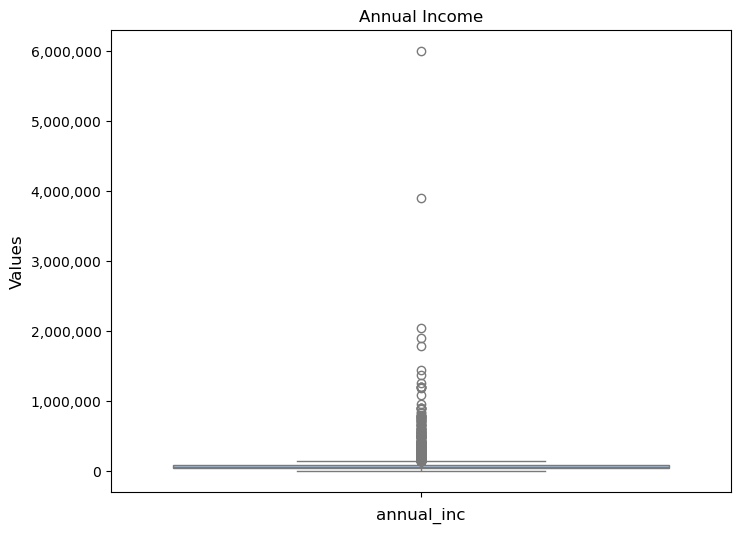

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_data['annual_inc'], orient='v', palette='pastel')
plt.title('Annual Income')
plt.xlabel('annual_inc', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [31]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    59000.00
0.75    82000.00
0.90   115000.00
0.95   140004.00
0.97   165000.00
0.98   187000.00
0.99   234000.00
Name: annual_inc, dtype: float64

In [32]:
loan_data = loan_data[loan_data['annual_inc'] < loan_data['annual_inc'].quantile(0.95)]
loan_data.shape

(36594, 20)

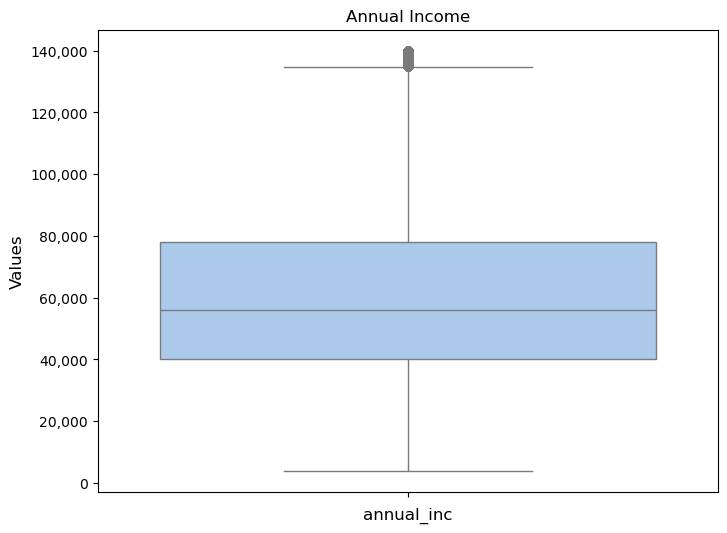

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_data['annual_inc'], orient='v', palette='pastel')
plt.title('Annual Income')
plt.xlabel('annual_inc', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

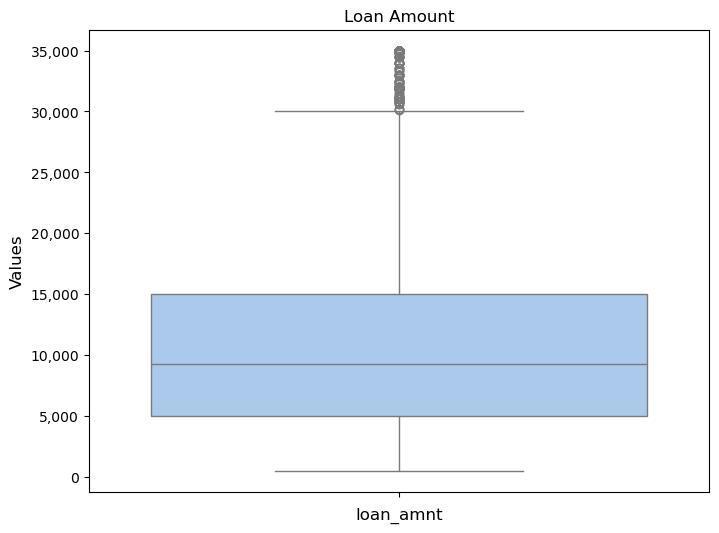

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_data['loan_amnt'], orient='h', palette='pastel')
plt.title('Loan Amount')
plt.xlabel('loan_amnt', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

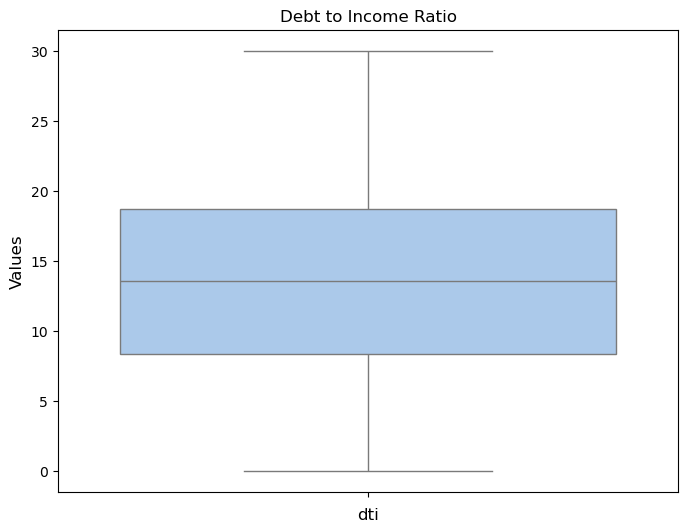

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_data['dti'], orient='h', palette='pastel')
plt.title('Debt to Income Ratio')
plt.xlabel('dti', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

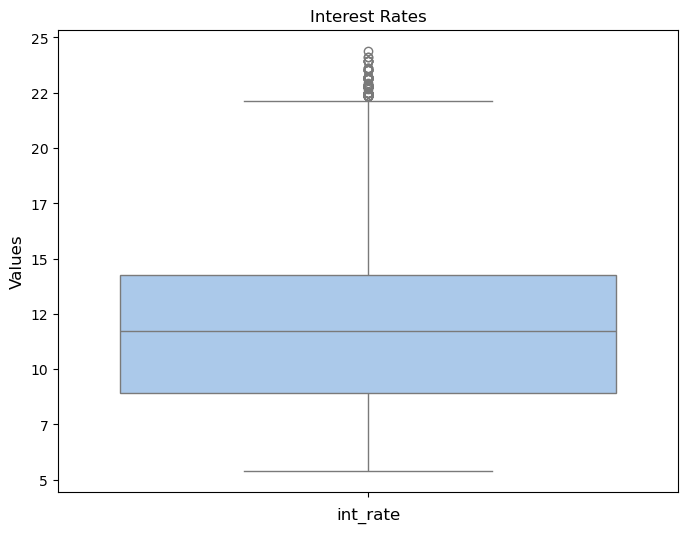

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_data['int_rate'], orient='h', palette='pastel')
plt.title('Interest Rates')
plt.xlabel('int_rate', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

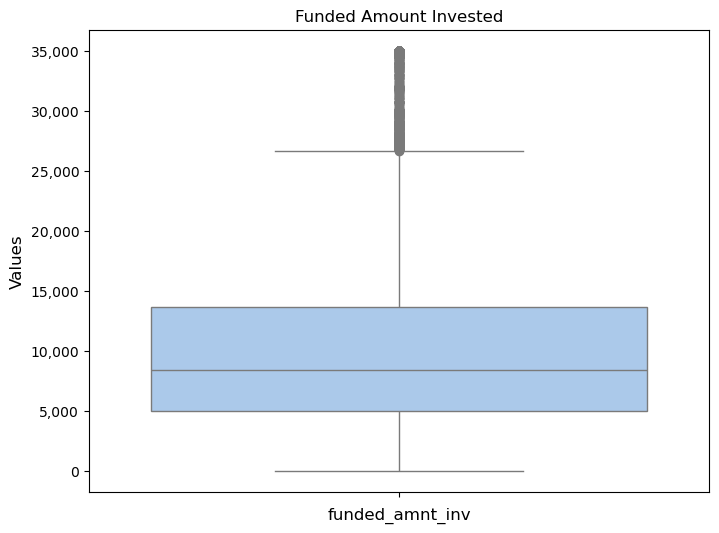

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_data['funded_amnt_inv'], orient='h', palette='pastel')
plt.title('Funded Amount Invested')
plt.xlabel('funded_amnt_inv', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

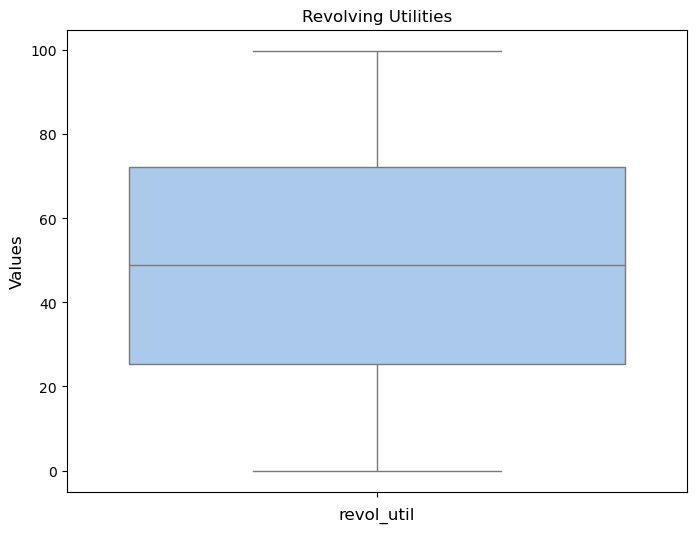

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=loan_data['revol_util'], orient='h', palette='pastel')
plt.title('Revolving Utilities')
plt.xlabel('revol_util', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

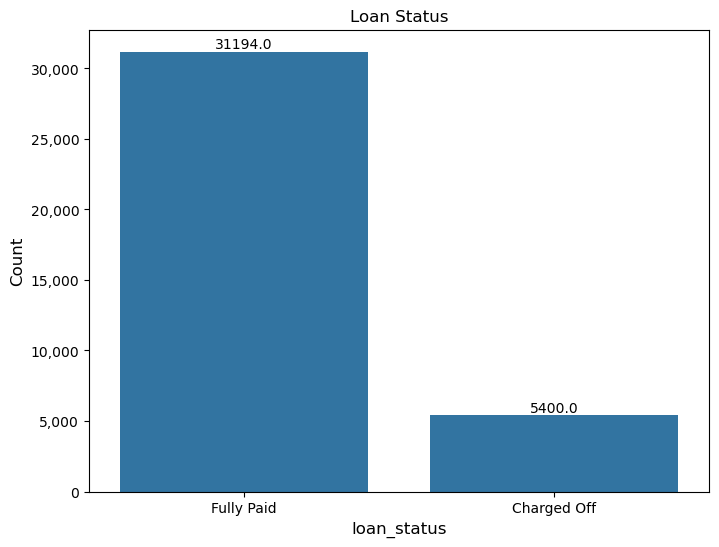

In [39]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'loan_status', data = loan_data)
plt.title('Loan Status')
plt.xlabel('loan_status', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

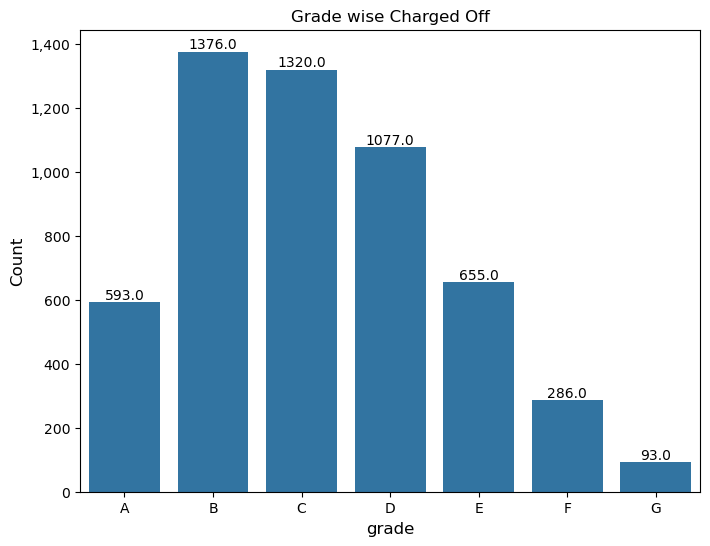

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Grade wise Charged Off')
plt.xlabel('grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

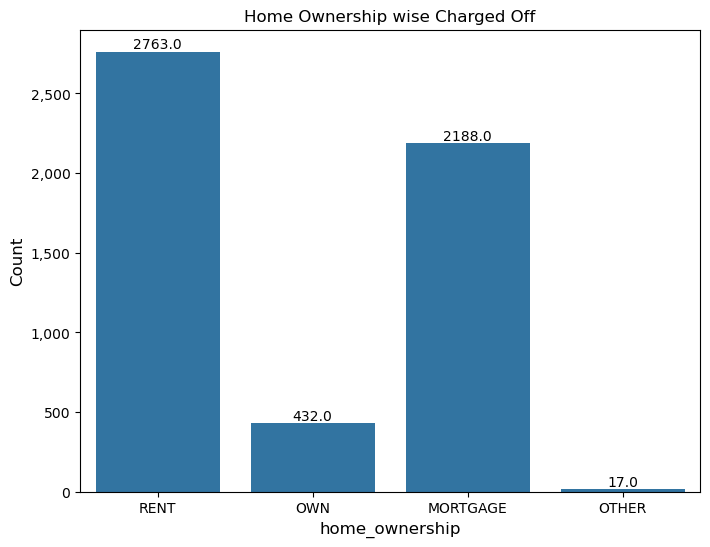

In [41]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Home Ownership wise Charged Off')
plt.xlabel('home_ownership', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

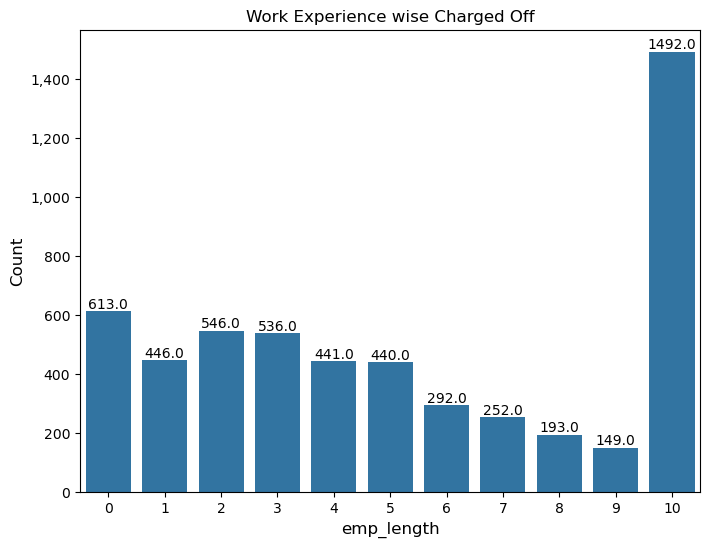

In [42]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'emp_length', data = loan_data[loan_data.loan_status == 'Charged Off'])
plt.title('Work Experience wise Charged Off')
plt.xlabel('emp_length', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

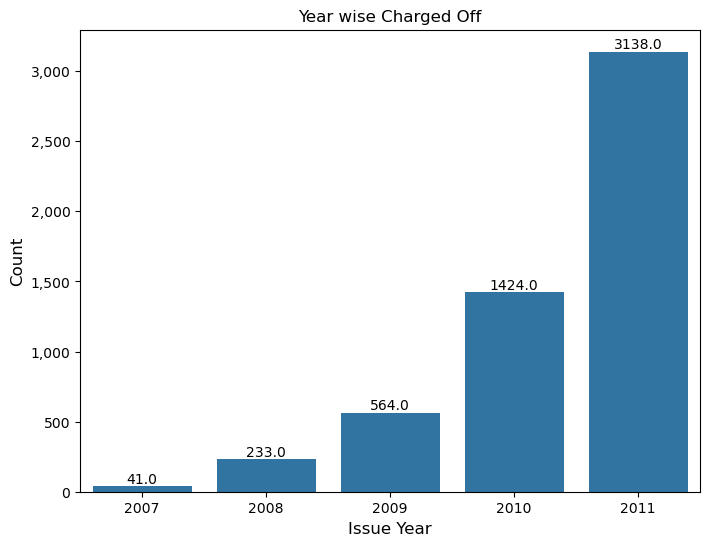

In [43]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='issue_d_year', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Year wise Charged Off')
plt.xlabel('Issue Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

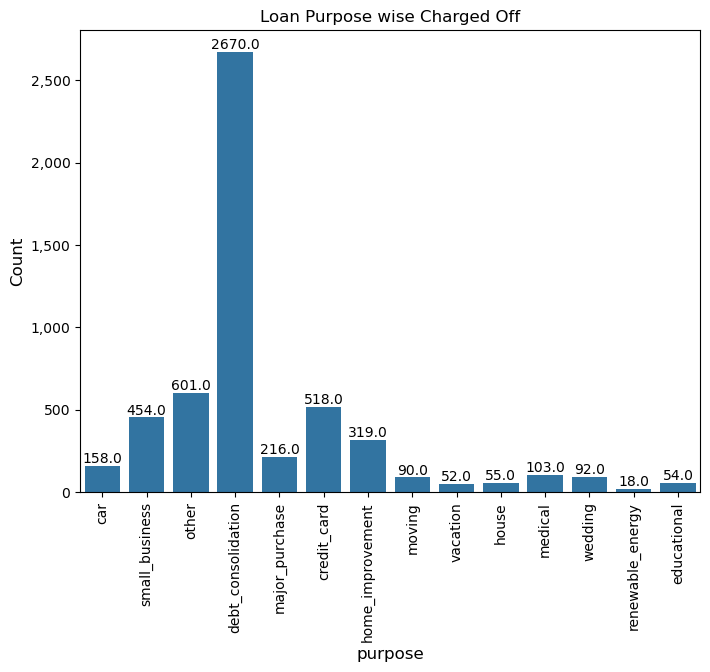

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='purpose', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Loan Purpose wise Charged Off')
plt.xlabel('purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

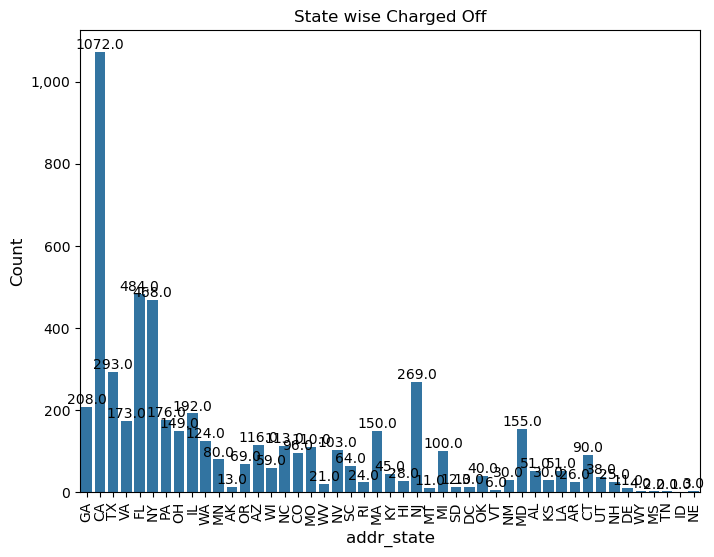

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='addr_state', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('State wise Charged Off')
plt.xlabel('addr_state', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

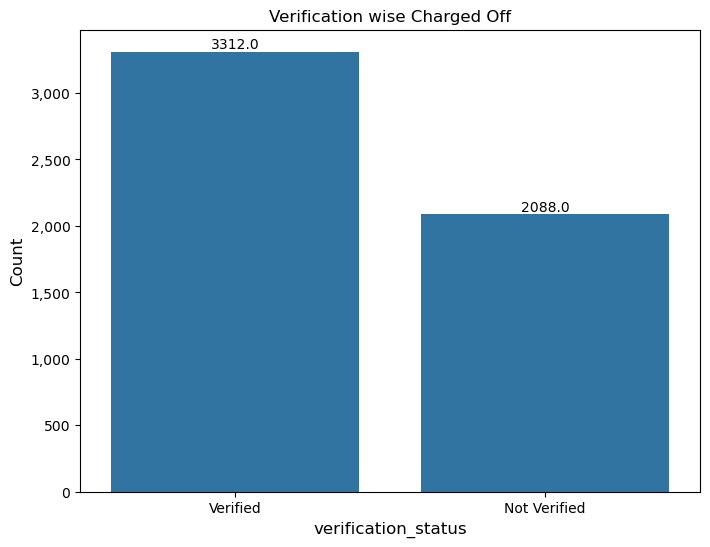

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Verification wise Charged Off')
plt.xlabel('verification_status', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

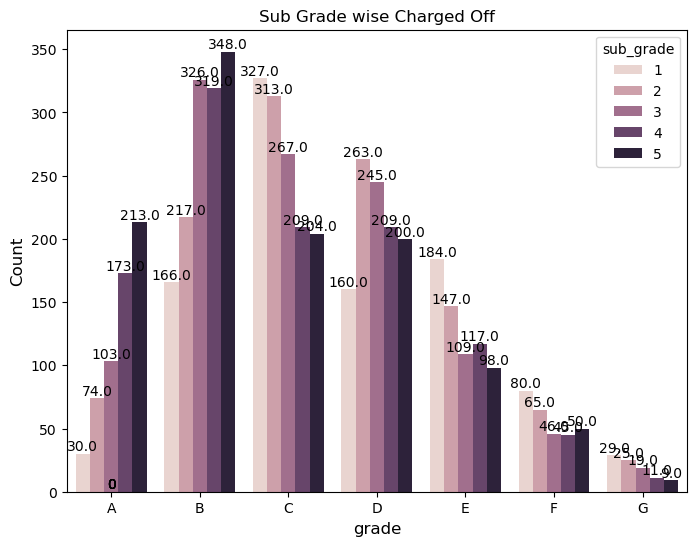

In [47]:
loan_data['sub_grade'] = pd.to_numeric(loan_data['sub_grade'].apply(lambda x : x[-1]))
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])
plt.title('Sub Grade wise Charged Off')
plt.xlabel('grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [48]:
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-11%','11%-14%','14%-18%','18%-24%'])
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels=['Up to $40,000','$40,000 - $50,000','$50,000 - $70,000','$70,000 - $90,000','Above $90,000'])
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], bins=5,precision =0,labels=['Up to $5,000','$5,000 - $7,500','$7,500 - $12,500','$12,500 - $20,000','Above $20,000'])
loan_data['revol_util_range'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['Up to 25%','25% - 35%','35% - 55%','55% - 75%','Above 75%'])
loan_data['dti_range'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['Up to 8','8 - 11','11 - 15','15 - 20','Above 20'])
loan_data['funded_amnt_inv_range'] = pd.cut(loan_data['funded_amnt_inv'], bins=5,precision =0,labels=['Up to $5,000','$5,000 - $8,000','$8,000 - $12,000','$12,000 - $18,000','Above $18,000'])

In [49]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,pub_rec,revol_util,issue_d_month,issue_d_year,int_rate_range,annual_inc_range,loan_amnt_range,revol_util_range,dti_range,funded_amnt_inv_range
0,5000.00,4975.00,36,10.65,B,2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1,0,83.70,12,2011,9%-11%,"Up to $40,000","Up to $5,000",Above 75%,Above 20,"Up to $5,000"
1,2500.00,2500.00,60,15.27,C,4,0,RENT,30000.00,Verified,2011-12-01,Charged Off,car,GA,1.00,5,0,9.40,12,2011,11%-14%,"Up to $40,000","Up to $5,000",Up to 25%,Up to 8,"Up to $5,000"
2,2400.00,2400.00,36,15.96,C,5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2,0,98.50,12,2011,11%-14%,"Up to $40,000","Up to $5,000",Above 75%,8 - 11,"Up to $5,000"
3,10000.00,10000.00,36,13.49,C,1,10,RENT,49200.00,Verified,2011-12-01,Fully Paid,other,CA,20.00,1,0,21.00,12,2011,11%-14%,"$40,000 - $50,000","$5,000 - $7,500",25% - 35%,15 - 20,"$5,000 - $8,000"
5,5000.00,5000.00,36,7.90,A,4,3,RENT,36000.00,Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,3,0,28.30,12,2011,5%-9%,"$40,000 - $50,000","Up to $5,000",25% - 35%,8 - 11,"Up to $5,000"


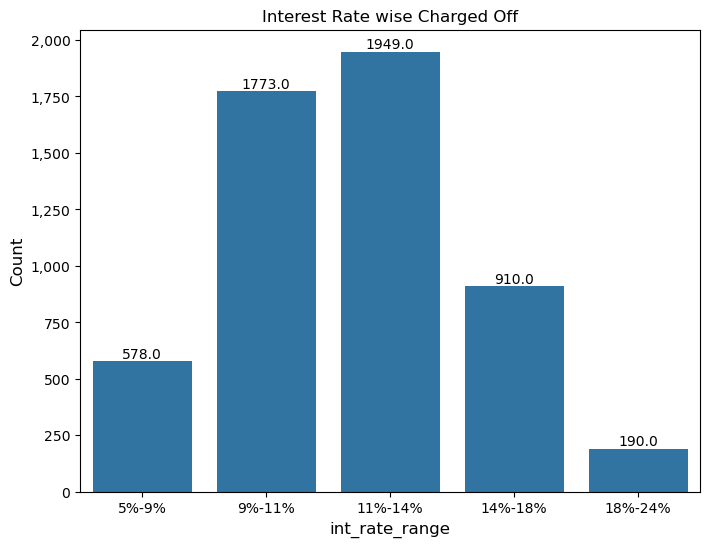

In [50]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='int_rate_range', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Interest Rate wise Charged Off')
plt.xlabel('int_rate_range', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

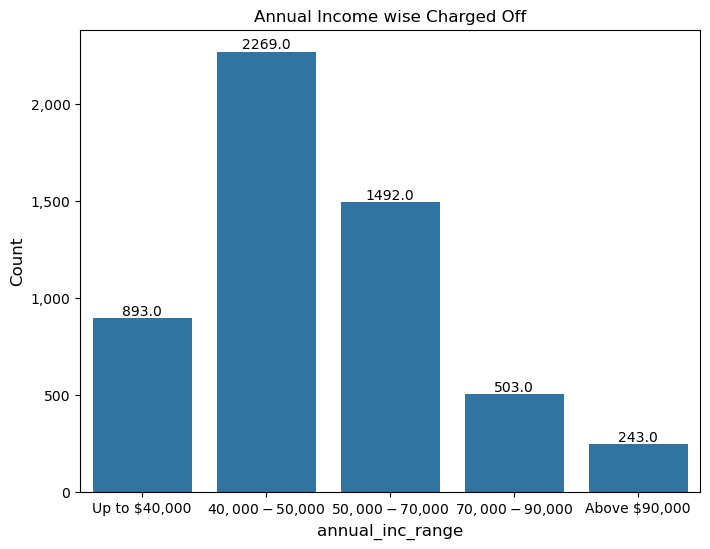

In [51]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='annual_inc_range', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Annual Income wise Charged Off')
plt.xlabel('annual_inc_range', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

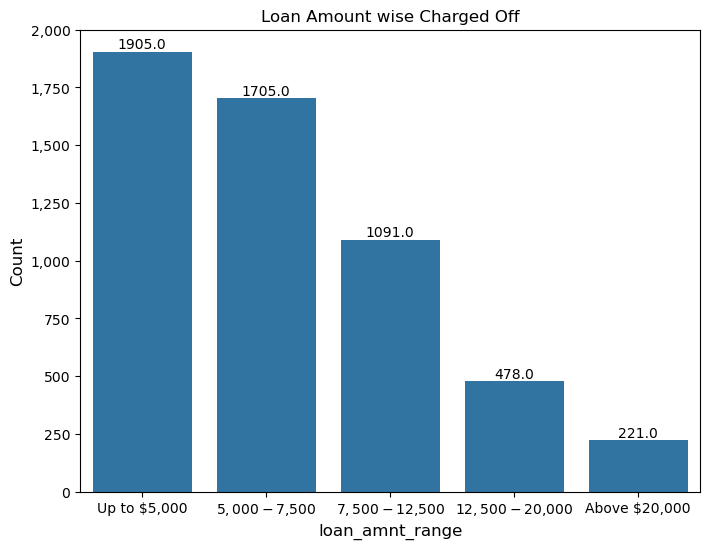

In [52]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_amnt_range', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Loan Amount wise Charged Off')
plt.xlabel('loan_amnt_range', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

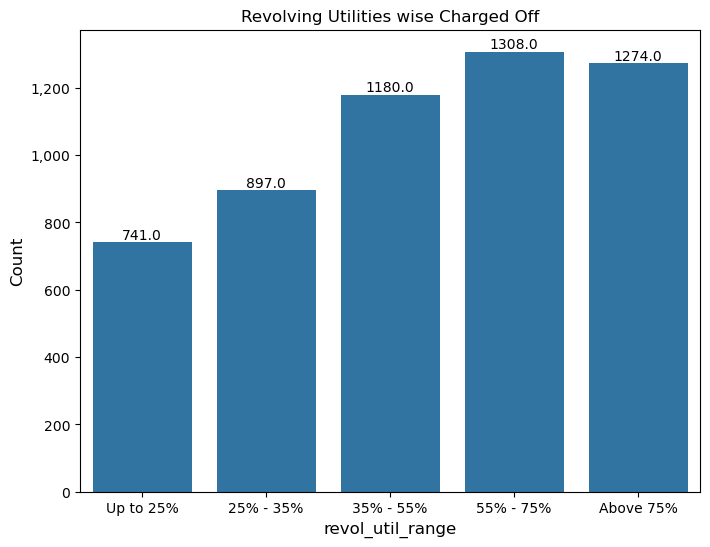

In [53]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='revol_util_range', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Revolving Utilities wise Charged Off')
plt.xlabel('revol_util_range', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

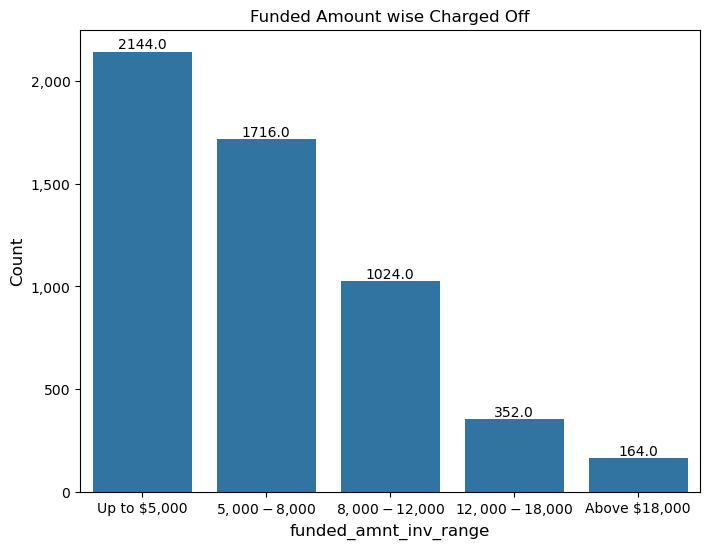

In [54]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='funded_amnt_inv_range', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Funded Amount wise Charged Off')
plt.xlabel('funded_amnt_inv_range', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

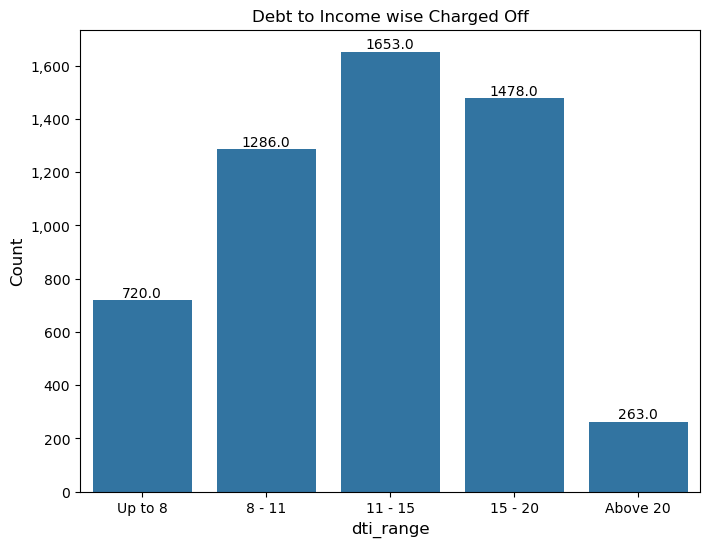

In [55]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='dti_range', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Debt to Income wise Charged Off')
plt.xlabel('dti_range', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

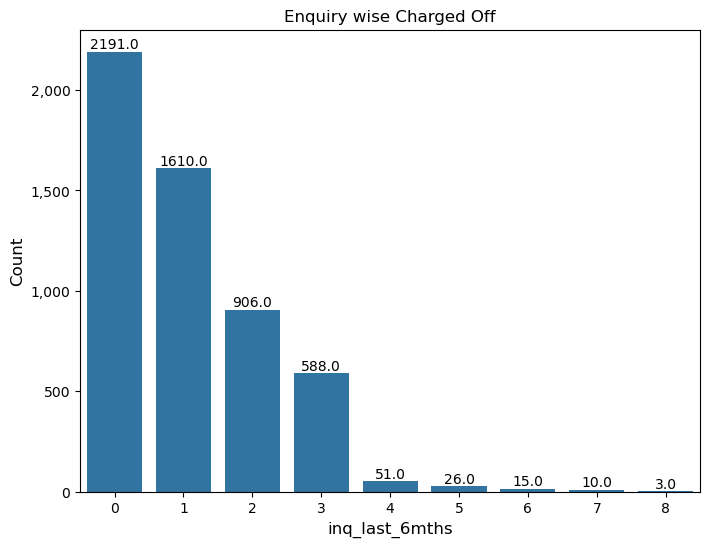

In [56]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Enquiry wise Charged Off')
plt.xlabel('inq_last_6mths', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

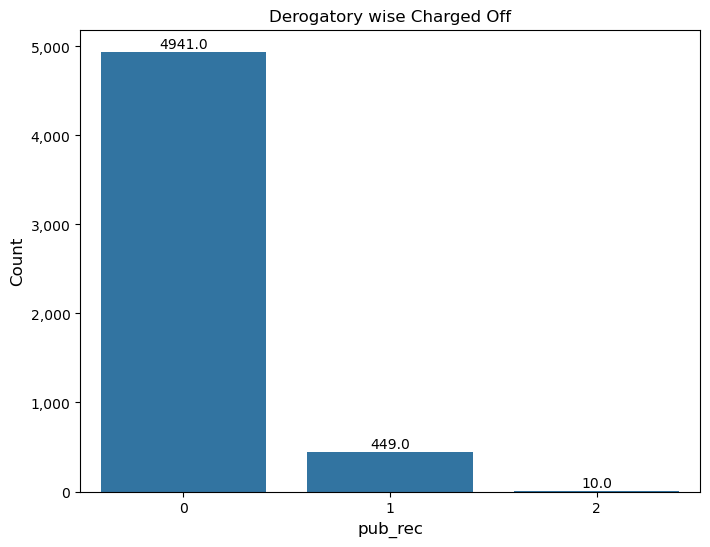

In [57]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Derogatory wise Charged Off')
plt.xlabel('pub_rec', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()